## Step 1: Importing the preprocessed dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset into a DataFrame
df = pd.read_csv("/Users/robertkurtz/Desktop/NBA 2023 Dataplayground/data/game_preprocessed.csv")
df.head(10)


,season,game_date,wl_home,team_name_home,team_name_away,min,fgm_home,fgm_away,fga_home,fga_away,...,blk_home,blk_away,tov_home,tov_away,pf_home,pf_away,season_start_year,game_year,game_month,game_day
0,89-90,1989-11-03,0,Miami Heat,New Jersey Nets,240,35.0,38.0,93.0,86.0,...,8.0,10.0,16.0,14.0,26.0,25.0,89,1989,11,3
1,89-90,1989-11-03,1,Chicago Bulls,Cleveland Cavaliers,265,44.0,48.0,93.0,93.0,...,5.0,6.0,12.0,20.0,25.0,30.0,89,1989,11,3
2,89-90,1989-11-03,1,Phoenix Suns,Golden State Warriors,240,49.0,36.0,96.0,89.0,...,3.0,6.0,17.0,29.0,29.0,32.0,89,1989,11,3
3,89-90,1989-11-03,1,Los Angeles Clippers,Houston Rockets,240,45.0,33.0,90.0,74.0,...,4.0,5.0,19.0,25.0,22.0,27.0,89,1989,11,3
4,89-90,1989-11-03,1,Boston Celtics,Milwaukee Bucks,240,49.0,35.0,81.0,83.0,...,5.0,4.0,16.0,9.0,27.0,31.0,89,1989,11,3
5,89-90,1989-11-03,1,Detroit Pistons,New York Knicks,240,37.0,41.0,79.0,83.0,...,8.0,5.0,18.0,20.0,19.0,26.0,89,1989,11,3
6,89-90,1989-11-03,1,Portland Trail Blazers,Sacramento Kings,240,51.0,35.0,100.0,84.0,...,6.0,6.0,22.0,15.0,27.0,16.0,89,1989,11,3
7,89-90,1989-11-03,1,Utah Jazz,Denver Nuggets,240,51.0,42.0,82.0,100.0,...,13.0,6.0,23.0,11.0,35.0,22.0,89,1989,11,3
8,89-90,1989-11-03,0,Dallas Mavericks,Los Angeles Lakers,240,35.0,43.0,84.0,92.0,...,7.0,10.0,18.0,19.0,22.0,21.0,89,1989,11,3
9,89-90,1989-11-03,1,Seattle SuperSonics,Minnesota Timberwolves,240,40.0,36.0,75.0,81.0,...,7.0,1.0,20.0,12.0,20.0,23.0,89,1989,11,3


In [3]:
df.columns

Index(['season', 'game_date', 'wl_home', 'team_name_home', 'team_name_away',
       'min', 'fgm_home', 'fgm_away', 'fga_home', 'fga_away', 'fg_pct_home',
       'fg_pct_away', 'fg3m_home', 'fg3m_away', 'fg3a_home', 'fg3a_away',
       'fg3_pct_home', 'fg3_pct_away', 'ftm_home', 'ftm_away', 'fta_home',
       'fta_away', 'ft_pct_home', 'ft_pct_away', 'oreb_home', 'oreb_away',
       'dreb_home', 'dreb_away', 'reb_home', 'reb_away', 'ast_home',
       'ast_away', 'stl_home', 'stl_away', 'blk_home', 'blk_away', 'tov_home',
       'tov_away', 'pf_home', 'pf_away', 'season_start_year', 'game_year',
       'game_month', 'game_day'],
      dtype='object')

## Step 2: Setting the target(y) and predictor(x) variables

In [4]:
# Select the features and target variable

# I NEED TO FIND OUT A WAY TO INCLUDE THE TEAM NAMES AND THE DATE OF THE GAME...

X = df[[ 'fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away']] #predictors
y = df['wl_home'] #target variable

## Step 3: Splitting the data into training and testing

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Step 4: Logistical Regression

### *Advantages:*

**Interpretability**: Logistic regression provides coefficients that can be easily interpreted to understand the impact of each feature on the predicted outcome.

**Efficiency**: Logistic regression is computationally efficient and can handle large datasets with a large number of features.

**Robust to Noise**: Logistic regression performs well even when there is noise or irrelevant features present in the dataset.

### *Disadvantages:*

**Limited Flexibility**: Logistic regression assumes a linear relationship between the features and the log-odds of the outcome, which may not capture complex interactions or non-linear patterns.

**Assumption of Linearity**: Logistic regression assumes that the relationship between the features and the log-odds of the outcome is linear, which may not hold in some cases.

**High Reliance on Proper Feature Engineering**: Logistic regression relies heavily on proper feature engineering to capture relevant information and interactions between variables.

In [6]:
#fittin the model
logreg = LogisticRegression(random_state=0)

logreg.fit(X_train, y_train)

/Users/robertkurtz/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
#evaluate the model
y_pred = logreg.predict(X_test)

#accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.83


In [8]:
#Inserting the predictions into the model
df['predictions'] = logreg.predict(X)

#changing the order so that prediction is next to wl_home
df = df[['wl_home', 'predictions', 'fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away']]
df.head(10)

,wl_home,predictions,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away
0,0,0,0.376,0.594,0.250,19.0,51.0,0.442,0.892,0.167,20.0,50.0
1,1,1,0.473,0.744,0.364,27.0,44.0,0.516,0.576,0.286,32.0,46.0
2,1,1,0.510,0.833,0.500,32.0,48.0,0.404,0.833,0.400,20.0,44.0
3,1,1,0.500,0.545,0.000,30.0,38.0,0.446,0.750,0.250,16.0,36.0
4,1,1,0.605,0.718,0.333,37.0,44.0,0.422,0.907,0.455,21.0,28.0
5,1,1,0.468,0.800,0.364,28.0,45.0,0.494,0.692,0.300,23.0,38.0
6,1,1,0.510,0.786,0.250,32.0,54.0,0.417,0.800,0.143,18.0,31.0
7,1,1,0.622,0.643,0.500,35.0,48.0,0.420,0.750,0.200,25.0,36.0
8,0,0,0.417,0.821,0.250,19.0,47.0,0.467,0.636,0.200,26.0,50.0
9,1,1,0.533,0.759,0.500,22.0,42.0,0.444,0.778,0.250,14.0,34.0


In [9]:
#evaulating the model based on accuracy
print('The accuracy is: '+ str(accuracy_score(df['wl_home'], df['predictions'])))

#f1 score
from sklearn.metrics import f1_score
print('The F1 Score is: '+str(f1_score(df['wl_home'], df['predictions'])))



The accuracy is: 0.8344636336179676
The F1 Score is: 0.8645016293965615


## Step 5: Decision Tree

### *Advantages:*

**Interpretable:** Decision trees provide a clear and interpretable representation of decision rules, making it easy to understand the logic behind predictions.

**Non-parametric:** Decision trees can handle both numerical and categorical data without requiring strict assumptions about the underlying data distribution.

**Feature Importance:** Decision trees can measure the importance of each feature in the tree construction process, allowing for feature selection and understanding the impact of variables on predictions.

### *Disadvantages:*

**Overfitting:** Decision trees tend to overfit the training data if not properly pruned or regularized, leading to poor generalization performance on unseen data.

**Instability:** Decision trees are sensitive to small changes in the data and can produce different trees even with minor variations, which can lead to inconsistent results.

**Lack of Linearity:** Decision trees are not well-suited for capturing linear relationships between features and outcomes, as they rely on hierarchical splits based on thresholds.

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#acurracy score

y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))



Accuracy: 0.7732222934016656


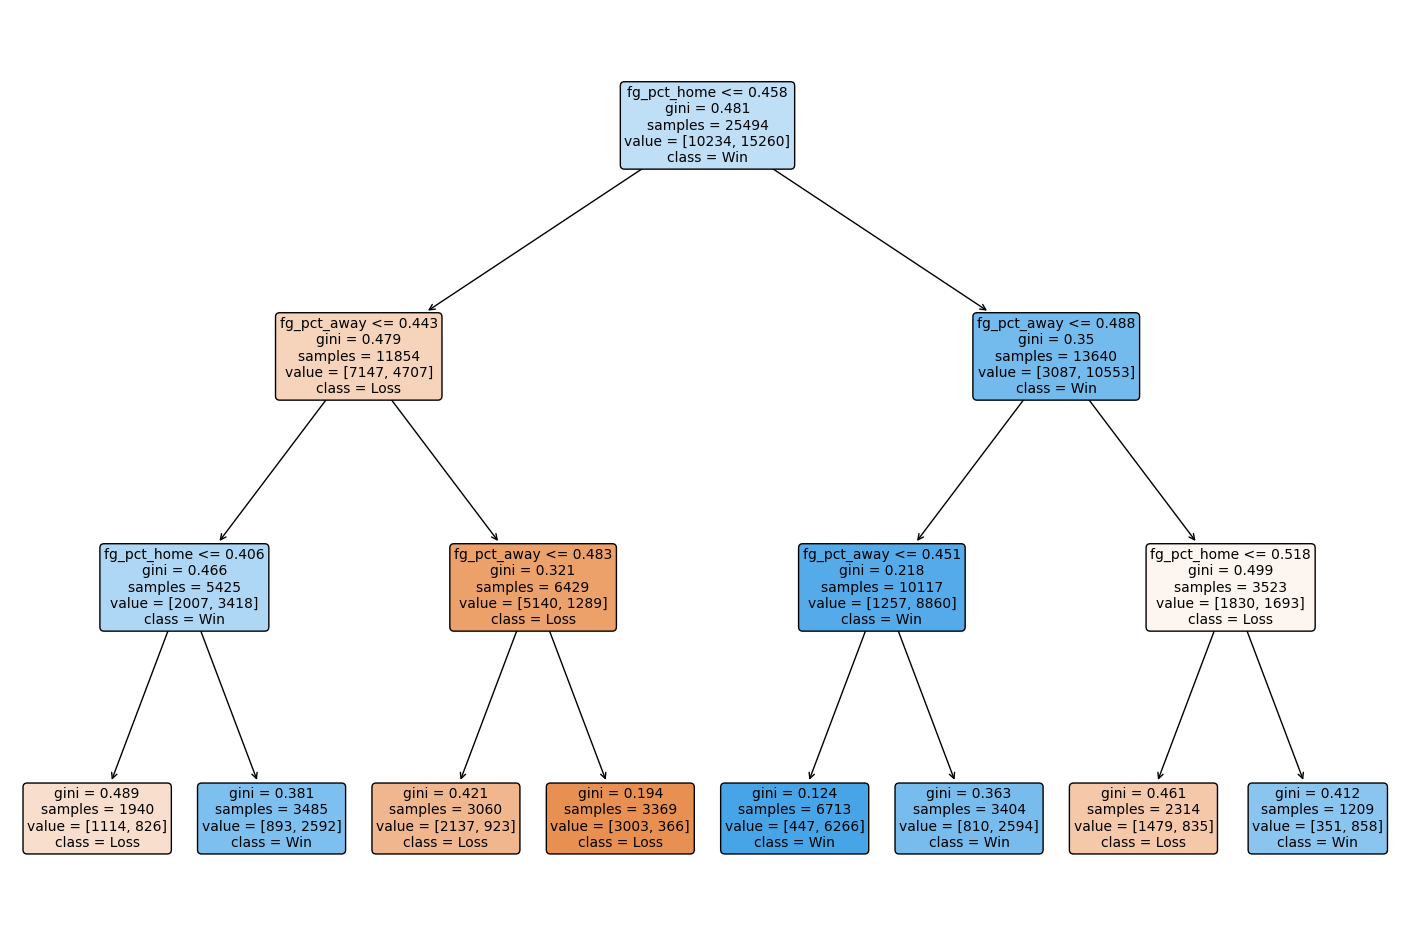

In [11]:
#plotting the tree

from sklearn.tree import plot_tree

plt.figure(figsize=(18,12))
plot_tree(clf, filled=True, rounded=True, class_names=['Loss', 'Win'], feature_names=X.columns)
plt.show()

## Step 6: Random Forrest

### Advantages:

**Improved Generalization:** Random Forest combines multiple decision trees, reducing overfitting and improving generalization performance compared to a single decision tree.

**Robust to Noise and Outliers:** Random Forest is less sensitive to noisy or outlier data points due to the averaging effect of multiple trees.

**Feature Importance:** Random Forest provides a measure of feature importance, allowing for feature selection and understanding of the most influential variables.

### Disadvantages:

**Complexity:** Random Forest models can be computationally expensive to train and require more memory compared to individual decision trees.

**Lack of Interpretability:** Although Random Forest provides feature importance, the overall model is not as interpretable as a single decision tree.

**Black Box Nature:** Random Forest is a complex ensemble model, making it challenging to understand the specific decision rules and logic behind individual predictions.

In [12]:
#using random forest
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
random_forrest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Fitting the model
random_forrest.fit(X_train, y_train)

#predictions
y_pred = random_forrest.predict(X_test)

#accuracy score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7929898416765809


## Step 7: Support Vector Machine Classification

### Advantages:

**Effective in High-Dimensional Spaces:** SVM performs well in high-dimensional spaces, making it suitable for problems with a large number of features.

**Versatility:** SVM offers flexibility by providing different kernel functions to capture non-linear relationships between features.

**Regularization:** SVM includes a regularization parameter that helps control overfitting and improves generalization performance.

### Disadvantages:

**Computational Complexity:** SVM can be computationally expensive, especially for large datasets with many samples.

**Sensitivity to Parameter Selection:** SVM performance is sensitive to the choice of parameters, such as the kernel type and regularization parameter, and selecting appropriate values can be challenging.

**Lack of Probability Estimates:** SVM does not provide direct probability estimates, making it less suitable for problems where probability estimation is important.

In [13]:
#using support vector machine
from sklearn.svm import SVC

# Create the model
svm = SVC(kernel='linear',random_state=0)

# Fitting the model
svm.fit(X_train, y_train)

#predictions
y_pred = svm.predict(X_test)

#accuracy score
print("The Accuracy after long calculation is:",accuracy_score(y_test, y_pred))


The Accuracy after long calculation is: 0.8363686281687563


## Step 8: Light GBM

### Advantages:

**High Efficiency:** LightGBM is designed to be computationally efficient and can handle large datasets and high-dimensional features.

**Tree-Based Learning:** LightGBM utilizes a tree-based learning algorithm, which allows it to capture complex interactions and non-linear patterns in the data effectively.

**Speed and Scalability:** LightGBM is known for its fast training speed and scalability, making it suitable for large-scale machine learning problems.

### Disadvantages:

**Prone to Overfitting:** LightGBM models are prone to overfitting if not properly regularized or if the dataset is small.

**Black Box Nature:** Like other tree-based models, LightGBM can be less interpretable compared to linear models, making it challenging to understand the underlying decision rules.

**Sensitivity to Hyperparameters:** LightGBM performance can be sensitive to hyperparameter tuning, requiring careful optimization to achieve the best results.

In [17]:
#using lightgbm

import lightgbm as lgb

# Create the model
lgbm = lgb.LGBMClassifier(random_state=0)

# Fitting the model
lgbm.fit(X_train, y_train)

#predictions
y_pred = lgbm.predict(X_test)

#accuracy score
print("The Accuracy after fast loading is:",accuracy_score(y_test, y_pred))

The Accuracy after fast loading is: 0.8352704310423721


## Step 9: KNN (k-nearest neighbour)

### *Advantages of KNN:*

**Simplicity:** KNN is a simple and intuitive algorithm that is easy to understand and implement. It does not make any assumptions about the underlying data distribution.

**Non-parametric:** KNN is a non-parametric algorithm, meaning it does not make assumptions about the shape of the decision boundaries. This makes it flexible and suitable for a wide range of classification problems.

**Adaptability to New Data:** KNN is an instance-based algorithm, which means it does not explicitly learn a model from the training data. This allows it to easily adapt to new training instances without requiring retraining.

### *Disadvantages of KNN:*

**Computational Complexity:** The KNN algorithm can be computationally expensive, especially when dealing with large datasets or high-dimensional feature spaces. As the dataset grows, the search for nearest neighbors becomes more time-consuming.

**Sensitivity to Feature Scaling:** KNN relies on distance-based calculations, and thus, it is sensitive to the scale of the features. Features with larger scales can dominate the distance computations and potentially bias the algorithm's predictions.

**Determining the Optimal Value of K:** The choice of the number of nearest neighbors (K) in KNN is crucial and can significantly impact the model's performance. Selecting an appropriate value of K is often a trial-and-error process, requiring careful consideration and validation.

In [19]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)

#predictions
y_pred = knn.predict(X_test)

#accuracy score
print("The rather poor Accuracy is:",accuracy_score(y_test, y_pred))

The rather poor Accuracy is: 0.700558250205912


# Final Step: Comparison amongst the approaches:

LightGBM achieved the highest Accuracy whilst being very efficient in the calculation time...